In [1]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import random

C:\Users\Home\AppData\Local\Temp\ipykernel_6352\2070441622.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
x = np.linspace(0.1, 7*np.pi, 200)
def fce(x):
    f= 15* np.arctan(x) * np.cos(x) * 18* np.log(x)
    return f

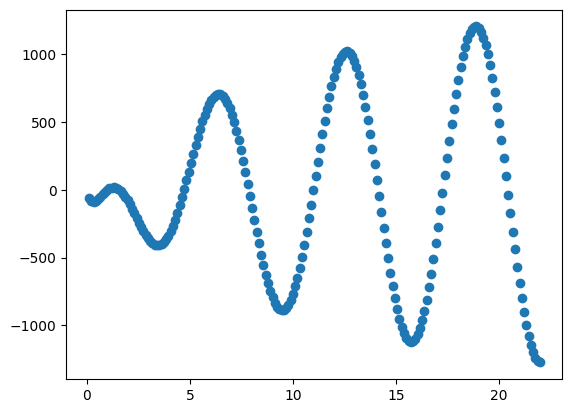

In [3]:
y = fce(x)
plt.scatter(x, y)

In [4]:
poloha= random.uniform(min(x),max(x))
vysledek = fce(poloha)
for i in range(50000):
    posunuti = random.uniform(-0.1,0.1)
    min_hledany = fce(poloha + posunuti)
    
    if min_hledany > vysledek:
        vysledek = min_hledany
        poloha = poloha + posunuti

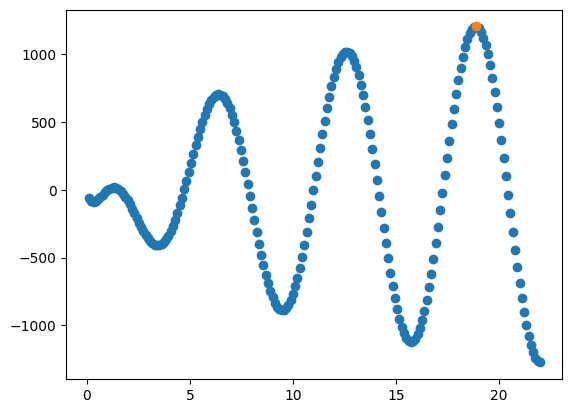

In [5]:
plt.scatter(x,y)
plt.scatter(poloha,vysledek)

zigani - horolozec s pouzitim metropolisuvu algoritmu
?horolozec po kazde nahodne generovani x, metropolis  - potomrk je soused, ohrivani a ohlazeni ma vliv na pravdepodobnost

v prubehu oh;azujeme system, a pravdepodobnost toho ze bude vybran ten hori potomek klesa(blizi se k nule)

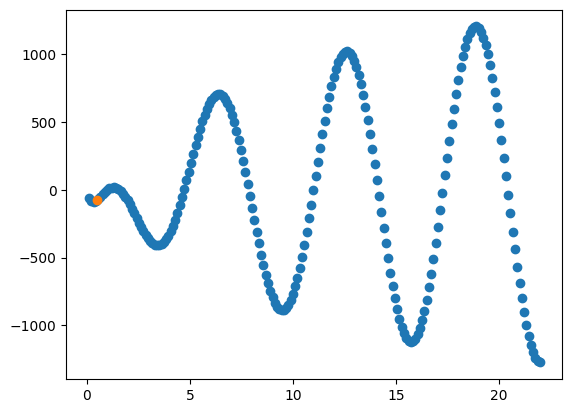

In [6]:
teploty = np.linspace(2, 0.5, 100)

poloha= random.uniform(min(x),max(x))
vysledny_y = fce(poloha)
for teplota in teploty:
    for i in range(500):
        posunuti = random.uniform(-0.1,0.1)
        polohovy_y = fce(poloha)
        posunuty_y = fce(poloha + posunuti)
        
        if poloha+posunuti < max(x) and poloha+posunuti > min(x):
            if posunuty_y > vysledny_y:
                vysledny_y = posunuty_y
                poloha = poloha + posunuti
            elif(random.random() < math.exp(-(posunuty_y - polohovy_y)/teplota)):
                vysledny_y = posunuty_y
                poloha = poloha + posunuti
        
plt.scatter(x,y)
vysledek = fce(poloha)
plt.scatter(poloha,vysledek)

A

In [7]:
dd = pd.read_csv("dist.csv")

In [8]:
dd.head()

,A,B,C,D,E
A,0,10,20,40,60
B,10,0,30,50,10
C,20,30,0,60,20
D,40,50,60,0,30
E,60,10,20,30,0


In [9]:
print(dd["A"]["B"])

10


cas mezi bodem A a B

In [10]:
seznam_mest = dd.columns
dd[seznam_mest[0]][seznam_mest[1]]
cas = 0
i=0
for i in range(len(seznam_mest)-1):
    cas += dd[seznam_mest[i]][seznam_mest[i+1]]
    i+=1
cas

130

pokus o generovani nahodne cesty

In [11]:
seznam = list(dd.columns)
generovany_seznam_mest = []
for i in range (len(seznam)):
    mesto = random.choice(seznam) 
    generovany_seznam_mest.append(mesto)
    seznam.remove(mesto)

f-ce pro generovani nohodneho cisla pro zvoleni z cesty

In [12]:
import random
def nah(seznam):
    nahodne_cislo = random.randint(0, len(seznam) - 1)
    return nahodne_cislo

In [13]:
def spocitat_cas_casty(tabulka, seznam_mest_generovanych):
    cas = 0
    i=0
    for i in range(len(seznam_mest_generovanych)-1):
        cas += tabulka[seznam_mest_generovanych[i]][seznam_mest_generovanych[i+1]]
    return cas

In [14]:
def hledani_nejlepsi_cesty(puvodni_tabulka):
    seznam = list(puvodni_tabulka.columns)
    seznam_pro_vytvoreni_prvniho_uzlu = seznam.copy()
    generovany_seznam_mest = []
    ulozene_data_casu = []

    for i in range (len(seznam)):
        mesto = random.choice(seznam_pro_vytvoreni_prvniho_uzlu) 
        generovany_seznam_mest.append(mesto)
        seznam_pro_vytvoreni_prvniho_uzlu.remove(mesto)
    puvodni_trasa = generovany_seznam_mest.copy()

    pocatecni_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)
    ulozene_data_casu.append(pocatecni_cas)


    teploty = np.linspace(2, 0.5, 50)

    for teplota in teploty:
        for krok in range(300):
            seznam_copy = seznam.copy()
            a = nah(seznam)
            seznam_copy.remove(seznam_copy[a])
            b = nah(seznam_copy)
            novy_generovany_seznam = generovany_seznam_mest.copy()
            novy_generovany_seznam[a], novy_generovany_seznam[b] = novy_generovany_seznam[b], novy_generovany_seznam[a]
            
            novy_cas = spocitat_cas_casty(puvodni_tabulka, novy_generovany_seznam)
            stary_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)
            
            if (novy_cas < stary_cas):
                generovany_seznam_mest = novy_generovany_seznam.copy()
                stary_cas = novy_cas

            elif(random.random() < math.exp(-(stary_cas - novy_cas)/teplota)):
                    generovany_seznam_mest = novy_generovany_seznam.copy()
                    stary_cas = novy_cas
                    
            if stary_cas < ulozene_data_casu[-1]:
                ulozene_data_casu.append(stary_cas)
            else:
                ulozene_data_casu.append(ulozene_data_casu[-1])

    return ulozene_data_casu, generovany_seznam_mest, puvodni_trasa


In [15]:
ulozene_data_casu, nejlesi_trasa, pocatecni_trasa = hledani_nejlepsi_cesty(dd)

iterace = np.linspace(1, len(ulozene_data_casu), len(ulozene_data_casu))

In [16]:
generovany_seznam_mest
pocatecni_trasa

['B', 'A', 'D', 'E', 'C']

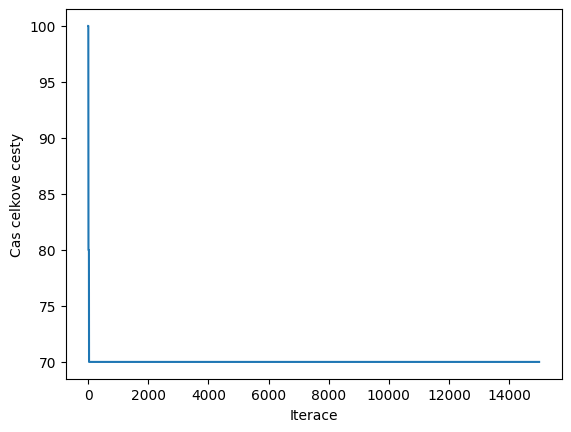

In [17]:
plt.plot(iterace, ulozene_data_casu)
plt.xlabel("Iterace")
plt.ylabel("Cas celkove cesty")
plt.show();

In [18]:
puvodnni_cas = spocitat_cas_casty(dd,pocatecni_trasa)

procenta = []
for i in range(0,len(ulozene_data_casu)):
    procenta.append(ulozene_data_casu[i] / puvodnni_cas * 100)

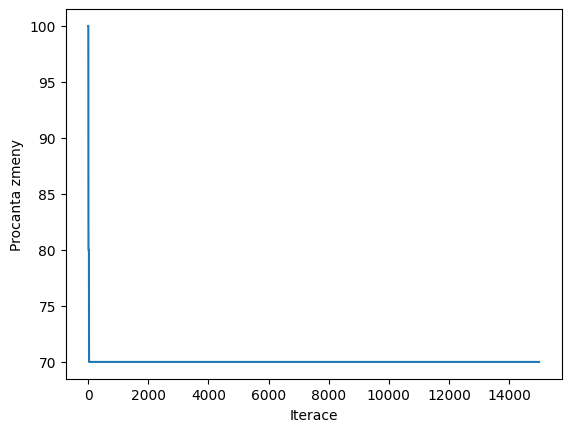

In [19]:
plt.plot(iterace, procenta)
plt.xlabel("Iterace")
plt.ylabel("Procanta zmeny")
plt.show();

# Zpracovani ulohy

In [20]:
mesta = pd.read_csv("cz.csv", usecols=['mesto', 'sirka', 'vyska'], nrows= 80)

In [21]:
mesta.head()

,mesto,sirka,vyska
0,Prague,50.0875,14.4214
1,Olomouc,49.5939,17.2508
2,Brno,49.1925,16.6083
3,Ostrava,49.8356,18.2925
4,Plzeň,49.7475,13.3775


In [22]:
len(mesta["mesto"])

80

In [23]:
import routingpy as rp
coordinaty = mesta[['vyska', 'sirka']].values
nazvy = mesta['mesto'].values

In [24]:
api_key = "ecaeaee9-a6f1-46f4-a531-10c6eeea1fb0"
api = rp.Graphhopper(api_key=api_key)
matrix = api.matrix(locations=coordinaty, profile='car')
durations = np.matrix(matrix.durations)
print(durations)

[[    0 10191  7395 ... 12959  6261  7836]
 [10265     0  3294 ...  4105 14656 11987]
 [ 7179  3204     0 ...  6421 12157  9488]
 ...
 [12932  4033  6548 ...     0 17909 15240]
 [ 6296 14644 12297 ... 17860     0 12578]
 [ 7836 12005  9658 ... 15221 12633     0]]


In [25]:
vazdalonost_copy = durations.copy()

In [26]:
tabulka = pd.DataFrame(vazdalonost_copy, columns=nazvy, index=nazvy)
tabulka/= (60*60) # hodiny 

In [27]:
# tabulka.to_csv("Tabulka_vzdalenosti_mezi_mesty.csv")

In [28]:
tabulka.head()

,Prague,Olomouc,Brno,Ostrava,Plzeň,Liberec,České Budějovice,Hradec Králové,Ústí nad Labem,Pardubice,...,Rakovník,Dvůr Králové nad Labem,Varnsdorf,Nymburk,Poděbrady,Turnov,Rokycany,Hlučín,Chodov,Český Krumlov
Prague,0.000000,2.830833,2.054167,3.553611,1.133333,1.207500,1.729167,1.302778,0.961667,1.388333,...,0.881389,1.567222,1.786944,0.864444,0.762500,1.003056,0.949167,3.599722,1.739167,2.176667
Olomouc,2.851389,0.000000,0.915000,1.094167,3.405833,3.150556,2.882222,1.883889,3.333333,1.847500,...,3.213056,2.220833,3.802778,2.321389,2.198611,2.853056,3.221667,1.140278,4.071111,3.329722
Brno,1.994167,0.890000,0.000000,1.737500,2.711667,2.834444,2.188056,2.238056,2.776389,2.044167,...,2.518889,2.574722,3.517500,2.281389,2.158611,2.630000,2.527500,1.783611,3.376944,2.635556
Ostrava,3.520278,1.048333,1.746944,0.000000,4.237500,4.055000,3.714167,2.788333,4.237778,2.751667,...,4.044722,3.125278,4.354444,3.225833,3.103056,3.757500,4.053333,0.276944,4.902778,4.161389
Plzeň,1.142222,3.395000,2.743056,4.242222,0.000000,2.126111,1.982222,2.153889,1.847778,2.239444,...,1.137500,2.418333,2.671111,1.715556,1.613889,1.921667,0.309444,4.288333,1.327222,2.320278


In [29]:
nazvy_mest = list(tabulka.columns)
nazvy_mest_pro_vytvoreni_prvni_trasy = nazvy_mest.copy()
prvni_nahodne_sgenerovana_trasa = []

for i in range(len(nazvy_mest)):
    mesto = random.choice(nazvy_mest_pro_vytvoreni_prvni_trasy)
    prvni_nahodne_sgenerovana_trasa.append(mesto)
    nazvy_mest_pro_vytvoreni_prvni_trasy.remove(mesto)

In [30]:
print(prvni_nahodne_sgenerovana_trasa)
len(prvni_nahodne_sgenerovana_trasa)

['Český Krumlov', 'Brandýs nad Labem-Stará Boleslav', 'Nový Jičín', 'Svitavy', 'Kolín', 'Ústí nad Labem', 'Zlín', 'Beroun', 'Břevnov', 'Bruntál', 'České Budějovice', 'Krnov', 'Hradec Králové', 'Rakovník', 'Bílina', 'Bystrc', 'Tábor', 'Líšeň', 'Hlučín', 'Mladá Boleslav', 'Olomouc', 'Ostrava', 'Teplice', 'Kopřivnice', 'Český Těšín', 'Blansko', 'Znojmo', 'Žatec', 'Vsetín', 'Prostějov', 'Dvůr Králové nad Labem', 'Bohumín', 'Žďár nad Sázavou', 'Sokolov', 'Přerov', 'Louny', 'Jičín', 'Kroměříž', 'Varnsdorf', 'Valašské Meziříčí', 'Říčany', 'Mělník', 'Chrudim', 'Jablonec nad Nisou', 'Neratovice', 'Náchod', 'Nymburk', 'Jihlava', 'Poděbrady', 'Pardubice', 'Šumperk', 'Liberec', 'Prague', 'Opava', 'Kutná Hora', 'Kralupy nad Vltavou', 'Jirkov', 'Orlová', 'Litvínov', 'Frýdek-Místek', 'Třebíč', 'Most', 'Havířov', 'Chomutov', 'Brno', 'Litoměřice', 'Karlovy Vary', 'Slaný', 'Česká Lípa', 'Turnov', 'Chodov', 'Uherské Hradiště', 'Písek', 'Příbram', 'Otrokovice', 'Strakonice', 'Plzeň', 'Kladno', 'Rokycany',

80

In [31]:
def generovani_souradnic(trasa):
    souradnice_mest_trasy = []
    for i in range(len(trasa)):
        radek = mesta.loc[mesta["mesto"] == trasa[i]]
        radek = radek[['vyska', 'sirka']].values[0]
        souradnice_mest_trasy.append(radek)
    return souradnice_mest_trasy

In [32]:
souradnice_mest_trasy_pocatecni = generovani_souradnic(prvni_nahodne_sgenerovana_trasa)
print(prvni_nahodne_sgenerovana_trasa)

['Český Krumlov', 'Brandýs nad Labem-Stará Boleslav', 'Nový Jičín', 'Svitavy', 'Kolín', 'Ústí nad Labem', 'Zlín', 'Beroun', 'Břevnov', 'Bruntál', 'České Budějovice', 'Krnov', 'Hradec Králové', 'Rakovník', 'Bílina', 'Bystrc', 'Tábor', 'Líšeň', 'Hlučín', 'Mladá Boleslav', 'Olomouc', 'Ostrava', 'Teplice', 'Kopřivnice', 'Český Těšín', 'Blansko', 'Znojmo', 'Žatec', 'Vsetín', 'Prostějov', 'Dvůr Králové nad Labem', 'Bohumín', 'Žďár nad Sázavou', 'Sokolov', 'Přerov', 'Louny', 'Jičín', 'Kroměříž', 'Varnsdorf', 'Valašské Meziříčí', 'Říčany', 'Mělník', 'Chrudim', 'Jablonec nad Nisou', 'Neratovice', 'Náchod', 'Nymburk', 'Jihlava', 'Poděbrady', 'Pardubice', 'Šumperk', 'Liberec', 'Prague', 'Opava', 'Kutná Hora', 'Kralupy nad Vltavou', 'Jirkov', 'Orlová', 'Litvínov', 'Frýdek-Místek', 'Třebíč', 'Most', 'Havířov', 'Chomutov', 'Brno', 'Litoměřice', 'Karlovy Vary', 'Slaný', 'Česká Lípa', 'Turnov', 'Chodov', 'Uherské Hradiště', 'Písek', 'Příbram', 'Otrokovice', 'Strakonice', 'Plzeň', 'Kladno', 'Rokycany',

In [33]:
import folium
def generate_map(coordinates, names, directions):
    # folium needs lat, long
    coordinates = [(y, x) for (x, y) in coordinates]
    route_points = [(y, x) for (x, y) in directions]
    lat_centre = np.mean([x for (x, y) in coordinates])
    lon_centre = np.mean([y for (x, y) in coordinates])
    centre = lat_centre, lon_centre
    
    m = folium.Map(location=centre, zoom_start=1, zoom_control=False)
    
    # plot the route line
    folium.PolyLine(route_points, color='red', weight=2).add_to(m)
    
    # plot each point with a hover tooltip
    for i, (point, name) in enumerate(zip(coordinates, names)):
        folium.CircleMarker(location=point, tooltip=f'{i}: {name}', radius=2).add_to(m)
        
    custom_tile_layer = folium.TileLayer(
        tiles='http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png',
        attr='CartoDB Positron',
        name='Positron',
        overlay=True,
        control=True,
        opacity=0.7 # Adjust opacity to control the level of greying out
        )
    custom_tile_layer.add_to(m)
    folium.LayerControl().add_to(m)
    
    sw = (np.min([x for (x, y) in coordinates]), np.min([y for (x, y) in coordinates]))
    ne = (np.max([x for (x, y) in coordinates]), np.max([y for (x, y) in coordinates]))
    m.fit_bounds([sw, ne])
    
    return m

In [34]:
generate_map(coordinaty, nazvy, souradnice_mest_trasy_pocatecni).save('pocatecni_trasa.html')

In [35]:
import random
def nah(seznam):
    nahodne_cislo = random.randint(0, len(seznam) - 1)
    return nahodne_cislo

def spocitat_cas_casty(tabulka, seznam_mest_generovanych):
    cas = 0
    i=0
    for i in range(len(seznam_mest_generovanych)-1):
        cas += tabulka[seznam_mest_generovanych[i]][seznam_mest_generovanych[i+1]]
    return cas

In [58]:
def hledani_nejlepsi_cesty(puvodni_tabulka):
    seznam = list(puvodni_tabulka.columns)
    seznam_pro_vytvoreni_prvniho_uzlu = seznam.copy()
    generovany_seznam_mest = []
    ulozene_data_casu = []

    for i in range (len(seznam)):
        mesto = random.choice(seznam_pro_vytvoreni_prvniho_uzlu) 
        generovany_seznam_mest.append(mesto)
        seznam_pro_vytvoreni_prvniho_uzlu.remove(mesto)
    puvodni_trasa = generovany_seznam_mest.copy()

    pocatecni_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)
    ulozene_data_casu.append(pocatecni_cas)


    teploty = np.linspace(15, 0.1, 1500)

    for teplota in teploty:
        for krok in range(4000):
            seznam_copy = seznam.copy()
            a = nah(seznam)
            seznam_copy.remove(seznam_copy[a])
            b = nah(seznam_copy)
            novy_generovany_seznam = generovany_seznam_mest.copy()
            novy_generovany_seznam[a], novy_generovany_seznam[b] = novy_generovany_seznam[b], novy_generovany_seznam[a]
            
            novy_cas = spocitat_cas_casty(puvodni_tabulka, novy_generovany_seznam)
            stary_cas = spocitat_cas_casty(puvodni_tabulka, generovany_seznam_mest)

            if (novy_cas < stary_cas):
                generovany_seznam_mest = novy_generovany_seznam.copy()
                stary_cas = novy_cas
                

            elif(random.random() < math.exp(-(stary_cas - novy_cas)/teplota)):
                    generovany_seznam_mest = novy_generovany_seznam.copy()
                    stary_cas = novy_cas
                    
            if stary_cas < ulozene_data_casu[-1]:
                ulozene_data_casu.append(stary_cas)
            else:
                ulozene_data_casu.append(ulozene_data_casu[-1])

    return ulozene_data_casu, generovany_seznam_mest, puvodni_trasa


In [59]:
ulozene_data_casu, nejlesi_trasa, pocatecni_trasa = hledani_nejlepsi_cesty(tabulka)

iterace = np.linspace(1, len(ulozene_data_casu), len(ulozene_data_casu))

In [60]:
generovany_seznam_mest
pocatecni_trasa

['Bílina',
 'Pardubice',
 'Krnov',
 'Sokolov',
 'Slaný',
 'Litoměřice',
 'České Budějovice',
 'Rokycany',
 'Žatec',
 'Poděbrady',
 'Šumperk',
 'Liberec',
 'Chomutov',
 'Neratovice',
 'Jihlava',
 'Česká Lípa',
 'Říčany',
 'Chodov',
 'Líšeň',
 'Most',
 'Třebíč',
 'Opava',
 'Louny',
 'Dvůr Králové nad Labem',
 'Český Těšín',
 'Zlín',
 'Příbram',
 'Český Krumlov',
 'Valašské Meziříčí',
 'Znojmo',
 'Frýdek-Místek',
 'Jablonec nad Nisou',
 'Strakonice',
 'Nymburk',
 'Bystrc',
 'Náchod',
 'Přerov',
 'Bohumín',
 'Svitavy',
 'Žďár nad Sázavou',
 'Otrokovice',
 'Kralupy nad Vltavou',
 'Rakovník',
 'Vsetín',
 'Bruntál',
 'Kutná Hora',
 'Prague',
 'Olomouc',
 'Hradec Králové',
 'Plzeň',
 'Chrudim',
 'Teplice',
 'Brno',
 'Brandýs nad Labem-Stará Boleslav',
 'Karlovy Vary',
 'Varnsdorf',
 'Mladá Boleslav',
 'Hlučín',
 'Kroměříž',
 'Ústí nad Labem',
 'Beroun',
 'Uherské Hradiště',
 'Havířov',
 'Jirkov',
 'Ostrava',
 'Litvínov',
 'Kopřivnice',
 'Nový Jičín',
 'Jičín',
 'Blansko',
 'Břevnov',
 'Prostěj

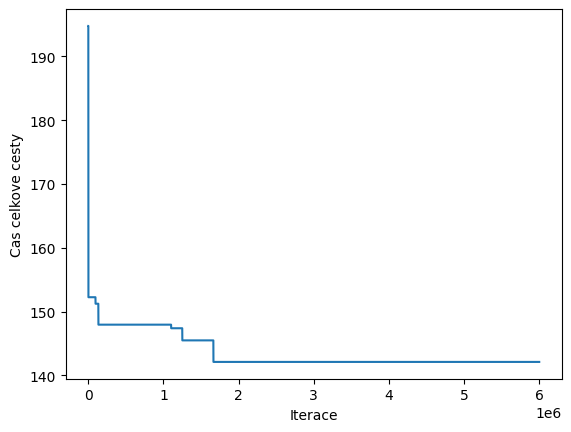

In [61]:
plt.plot(iterace, ulozene_data_casu)
plt.xlabel("Iterace")
plt.ylabel("Cas celkove cesty")
plt.show();

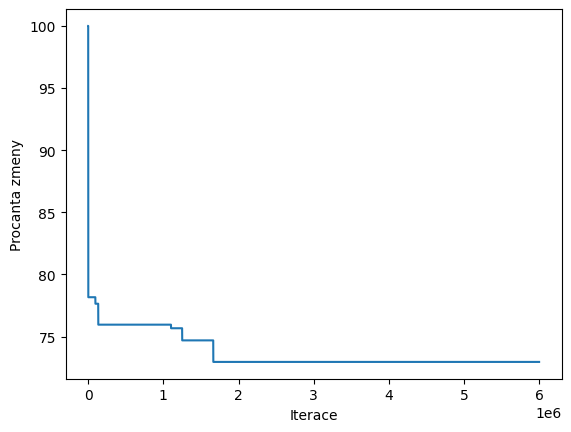

In [62]:
puvodnni_cas = spocitat_cas_casty(tabulka,pocatecni_trasa)

procenta = []
for i in range(0,len(ulozene_data_casu)):
    procenta.append(ulozene_data_casu[i] / puvodnni_cas * 100)

plt.plot(iterace, procenta)
plt.xlabel("Iterace")
plt.ylabel("Procanta zmeny")
plt.show();

In [55]:
souradnice_mest_trasy_nejlepsi = generovani_souradnic(nejlesi_trasa)

generate_map(coordinaty, nazvy, souradnice_mest_trasy_nejlepsi).save('nejlepsi_trasa1.html')

In [56]:
souradnice_mest_trasy_poca = generovani_souradnic(pocatecni_trasa)

generate_map(coordinaty, nazvy, souradnice_mest_trasy_poca).save('pocatecni_trasa1.html')